In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

In [3]:
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/data'

In [4]:
my_cosmo_cat = pd.read_csv(f'{data_folder}/cosmos-matched-all-df.csv', index_col = 0)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (460,1000) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
my_cosmo_cat.head()

,SourceID,ra_1,dec_1,clon_1,clat_1,id_1,x_image_1,y_image_1,errx2_image_1,erry2_image_1,...,sfr_best_2,ssfr_med_2,ssfr_med_min68_2,ssfr_med_max68_2,ssfr_best_2,l_nu_2,l_r_2,l_k_2,dist_2,angle_2
0,4000705532455,150.679866,2.196563,10h02m43.17s,02d11m47.63s,590539,9199.92676,21737.71094,0.00013,0.00013,...,-1.055,-8.625,-8.745,-8.435,-8.666,27.074,27.260,27.124,9.361438,123.114321
1,4000705532984,150.673687,2.226308,10h02m41.68s,02d13m34.71s,610283,9348.38770,22451.56250,0.00000,0.00001,...,-0.219,-8.373,-8.837,-8.043,-8.287,27.848,27.868,27.811,7.778731,317.303720
2,4000705533312,150.668120,2.242867,10h02m40.35s,02d14m34.32s,621053,9482.06250,22848.95508,0.00002,0.00000,...,0.505,-10.300,-10.368,-10.231,-10.258,28.661,29.620,29.874,2.627196,14.847254
3,4000705533383,150.645145,2.237538,10h02m34.83s,02d14m15.14s,617834,10033.03906,22720.83008,0.00011,0.00019,...,1.032,-8.440,-8.550,-8.334,-8.448,29.135,29.232,29.068,2.241379,287.399545
4,4000705539529,149.686238,2.637428,09h58m44.70s,02d38m14.74s,882817,33027.07031,32317.89648,0.00007,0.00006,...,0.191,-8.863,-8.987,-8.724,-8.830,28.323,28.572,28.466,3.301196,89.699137


In [6]:
stu_cosmo_cat = pd.read_csv(f'{data_folder}/cat-matched-to-cosmos.csv', index_col = 0)[['SourceID', 'category']]

In [7]:
df_merge = my_cosmo_cat.merge(stu_cosmo_cat, on = 'SourceID', how = 'left')

In [8]:
df_merge.columns

Index(['SourceID', 'ra_1', 'dec_1', 'clon_1', 'clat_1', 'id_1', 'x_image_1',
       'y_image_1', 'errx2_image_1', 'erry2_image_1',
       ...
       'ssfr_med_2', 'ssfr_med_min68_2', 'ssfr_med_max68_2', 'ssfr_best_2',
       'l_nu_2', 'l_r_2', 'l_k_2', 'dist_2', 'angle_2', 'category'],
      dtype='object', length=1082)

### Looking at Redshift

In [9]:
len(df_merge.query('id_1 == id_2'))

0

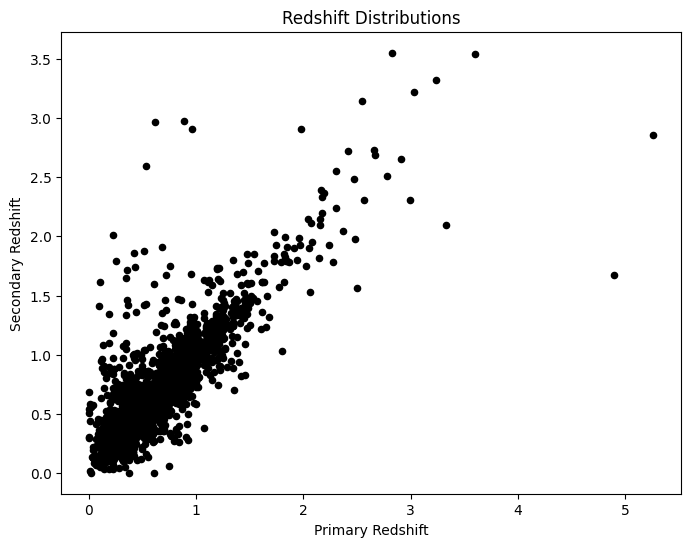

In [10]:
fig, ax1 = plt.subplots(nrows = 1)
df_merge.plot.scatter(
    x = 'photoz_1',
    y = 'photoz_2',
    ax = ax1,
    figsize = (8,6),
    grid = False,
    color = 'black',
)
ax1.set_title('Redshift Distributions')
ax1.set_xlabel('Primary Redshift')
ax1.set_ylabel('Secondary Redshift')
plt.show()

In [11]:
cos_red = df_merge[['SourceID', 'photoz_1', 'photoz_2']]

In [12]:
zs = cos_red.assign(redshift_sub = cos_red.apply(lambda row: row.photoz_1 - row.photoz_2, axis = 1))

In [13]:
real_mergers = zs.query('redshift_sub < 0.2 and redshift_sub > -0.2 ')[['SourceID', 'redshift_sub']]

In [14]:
len(real_mergers)

2463

In [15]:
df_merg = real_mergers.merge(df_merge, on = 'SourceID', how = 'left')

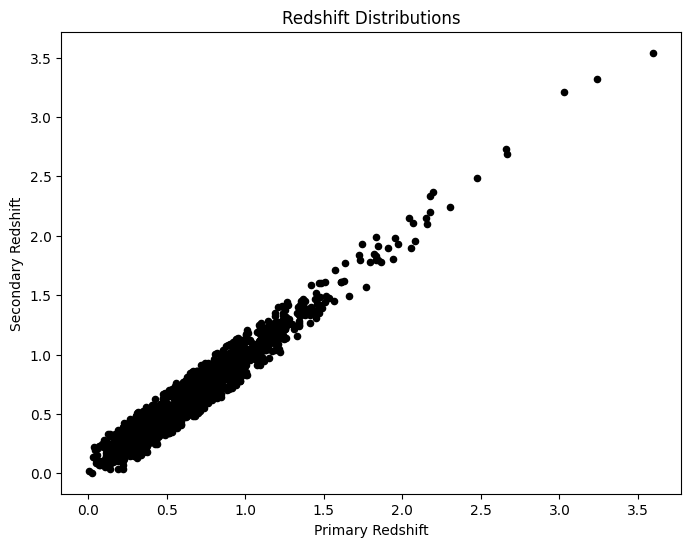

In [16]:
fig, ax1 = plt.subplots(nrows = 1)
df_merg.plot.scatter(
    x = 'photoz_1',
    y = 'photoz_2',
    ax = ax1,
    figsize = (8,6),
    grid = False,
    color = 'black',
)
ax1.set_title('Redshift Distributions')
ax1.set_xlabel('Primary Redshift')
ax1.set_ylabel('Secondary Redshift')
plt.show()

### Against Specific Star Formation Rate

In [17]:
df_merg.columns

Index(['SourceID', 'redshift_sub', 'ra_1', 'dec_1', 'clon_1', 'clat_1', 'id_1',
       'x_image_1', 'y_image_1', 'errx2_image_1',
       ...
       'ssfr_med_2', 'ssfr_med_min68_2', 'ssfr_med_max68_2', 'ssfr_best_2',
       'l_nu_2', 'l_r_2', 'l_k_2', 'dist_2', 'angle_2', 'category'],
      dtype='object', length=1083)

<AxesSubplot:xlabel='Primary Mass', ylabel='Primary sSFR'>

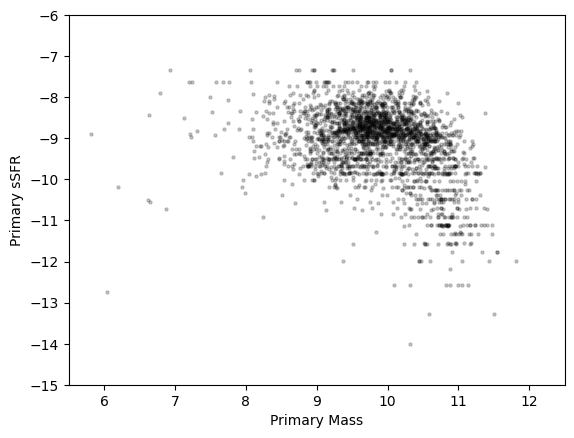

In [18]:
df_merg.plot.scatter(
    x = 'mass_best_1',
    y = 'ssfr_best_1',
    s = 5,
    color = 'black',
    alpha = 0.2,
    xlabel = 'Primary Mass',
    ylabel = 'Primary sSFR',
    xlim = [5.5, 12.5],
    ylim = [-15, -6]
)

### Controlling for Redshift

In [19]:
def binning_redshift(z, redshift_bins):
    if z <= redshift_bins[0]:
        return 0
    elif z > redshift_bins[0] and z <= redshift_bins[1]:
        return 1
    elif z > redshift_bins[1] and z <= redshift_bins[2]:
        return 2
    elif z > redshift_bins[2] and z <= redshift_bins[3]:
        return 3
    else:
        return 4

In [20]:
redshift_bins = [0.1, 0.3, 0.5, 1.0]

In [21]:
df_z = (
    df_merg
    .assign(z_bin = df_merg.photoz_1.apply(lambda x: binning_redshift(x, redshift_bins)))
)

In [22]:
def create_plot(df, ax, stage):    
    colours = ['brown', 'green', 'red', 'blue']
    for p, colour in enumerate(colours):
        df_stage = df.query(f'category == "stage{p+1}"')
        df_stage.plot.scatter(
            x = 'mass_best_1',
            y = 'ssfr_best_1',
            ax = ax,
            xlim = [5.5, 12.5],
            ylim = [-15, -6],
            xlabel = '',
            ylabel = '',
            color = colours[p],
            label = f'Stage {p+1}',
            alpha = 0.25,
            s = 5
        )
    plt.legend()

In [23]:
df_z.category.value_counts()

stage4    769
stage2    677
stage1    509
stage3    487
Name: category, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


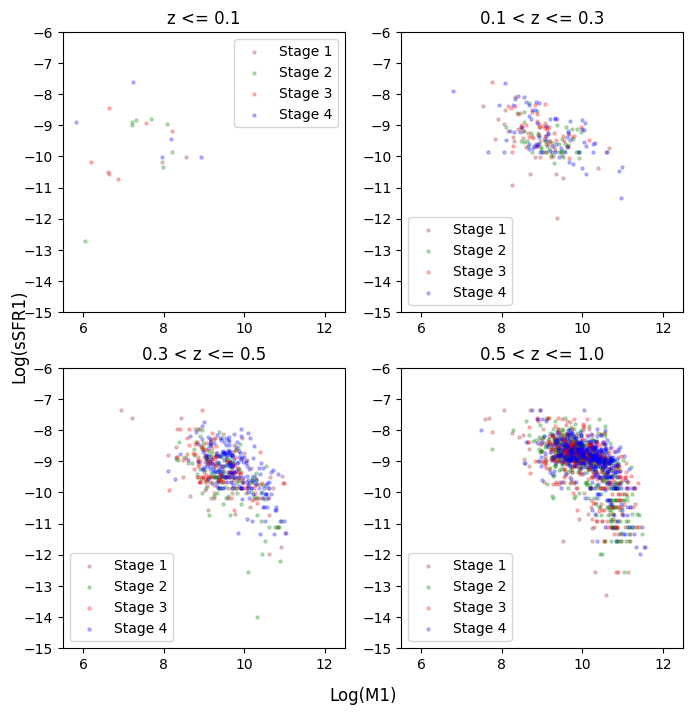

In [24]:
counter = 0
redshift_bin_list = ['z <= 0.1','0.1 < z <= 0.3','0.3 < z <= 0.5','0.5 < z <= 1.0']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot(df_z.query(f'z_bin == {counter}'), axes[i,j], counter)
        axes[i,j].set_title(redshift_bin_list[counter])
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

### Controlling for Redshift AND Stage

In [25]:
def create_plot_z(df, ax, bin_z):    
    df_stage = df.query(f'z_bin == @bin_z')
    df_stage.plot.scatter(
        x = 'mass_best_1',
        y = 'ssfr_best_1',
        ax = ax,
        xlim = [5.5, 12.5],
        ylim = [-15, -6],
        xlabel = '',
        ylabel = '',
        color = 'black',
        alpha = 0.25,
        s = 5
    )

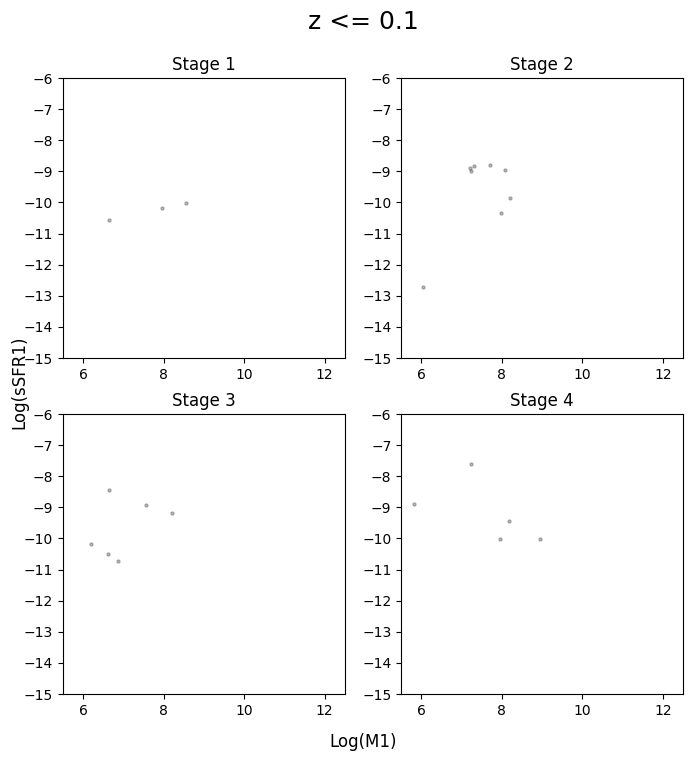

In [26]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 0)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, 'z <= 0.1', ha = 'center', va = 'center', fontsize = 18)

plt.show()

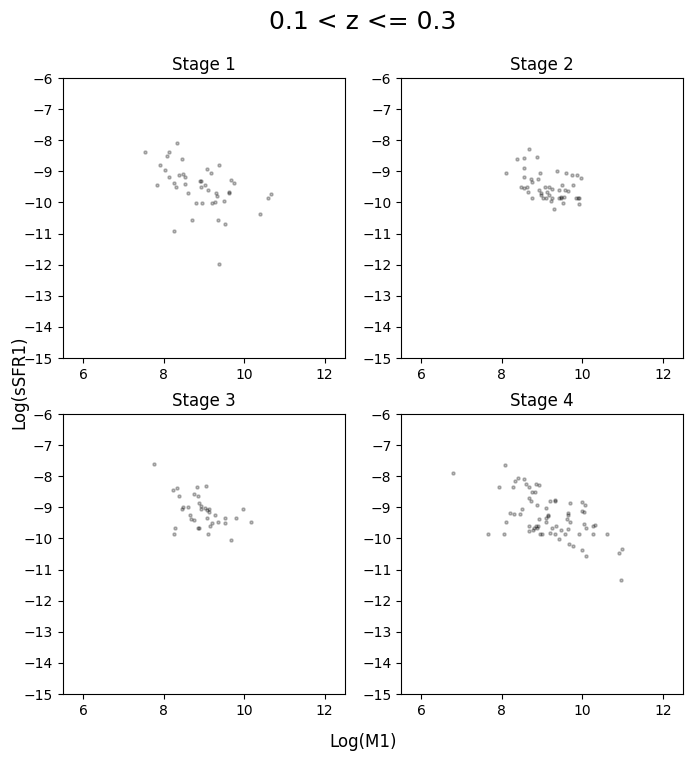

In [27]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 1)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.1 < z <= 0.3', ha = 'center', va = 'center', fontsize = 18)

plt.show()

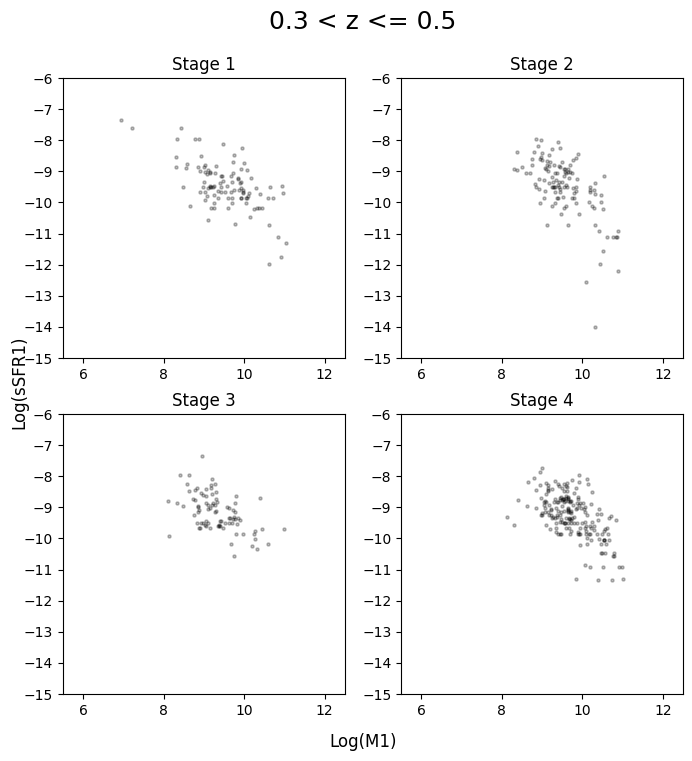

In [28]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 2)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.3 < z <= 0.5', ha = 'center', va = 'center', fontsize = 18)

plt.show()

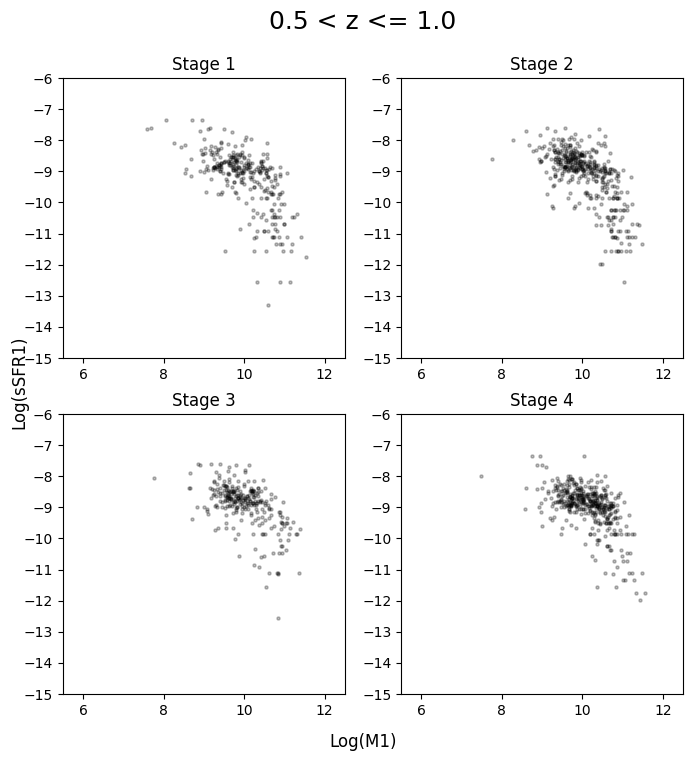

In [29]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 3)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.5 < z <= 1.0', ha = 'center', va = 'center', fontsize = 18)

plt.show()

### As Above, but Including Secondaries

In [30]:
def create_plot_z_sec(df, ax, bin_z):    
    df_stage = df.query(f'z_bin == @bin_z')
    df_stage.plot.scatter(
        x = 'mass_best_1',
        y = 'ssfr_best_1',
        ax = ax,
        xlim = [5.5, 12.5],
        ylim = [-15, -6],
        xlabel = '',
        ylabel = '',
        color = 'black',
        alpha = 0.25,
        s = 5
    )
    
    df_stage.plot.scatter(
        x = 'mass_best_2',
        y = 'ssfr_best_2',
        ax = ax,
        xlim = [5.5, 12.5],
        ylim = [-15, -6],
        xlabel = '',
        ylabel = '',
        color = 'blue',
        alpha = 0.25,
        s = 5
    )

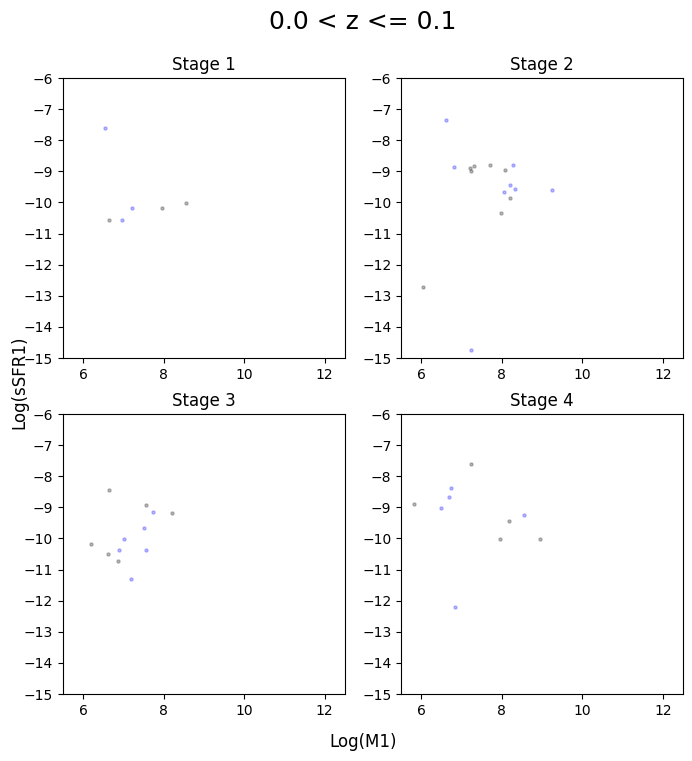

In [31]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sec(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 0)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.0 < z <= 0.1', ha = 'center', va = 'center', fontsize = 18)

plt.show()

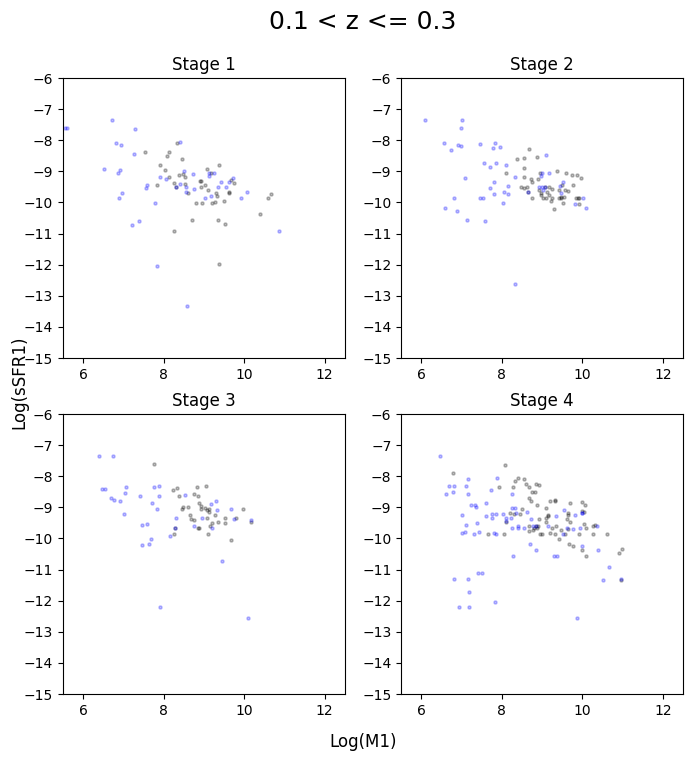

In [32]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sec(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 1)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.1 < z <= 0.3', ha = 'center', va = 'center', fontsize = 18)

plt.show()

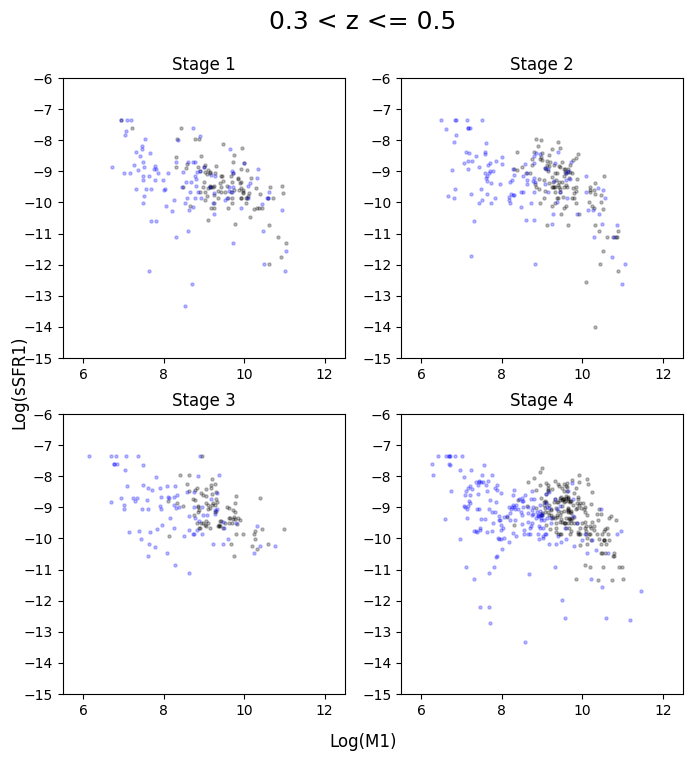

In [33]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sec(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 2)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.3 < z <= 0.5', ha = 'center', va = 'center', fontsize = 18)

plt.show()

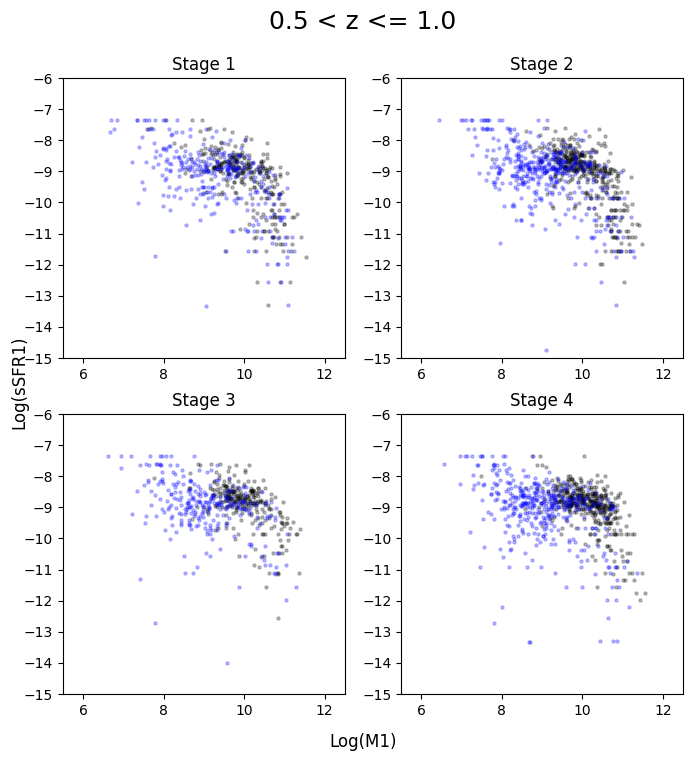

In [34]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sec(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 3)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.5 < z <= 1.0', ha = 'center', va = 'center', fontsize = 18)

plt.show()

### Totals

In [35]:
df_z.columns

Index(['SourceID', 'redshift_sub', 'ra_1', 'dec_1', 'clon_1', 'clat_1', 'id_1',
       'x_image_1', 'y_image_1', 'errx2_image_1',
       ...
       'ssfr_med_min68_2', 'ssfr_med_max68_2', 'ssfr_best_2', 'l_nu_2',
       'l_r_2', 'l_k_2', 'dist_2', 'angle_2', 'category', 'z_bin'],
      dtype='object', length=1084)

In [36]:
def add_log(logx1, logx2):
    x1 = 10**logx1
    x2 = 10**logx2
    return np.log10(x1 + x2)

In [37]:
def create_plot_z_sum(df, ax, bin_z):    
    df_stage = df.query(f'z_bin == @bin_z')
    df_tmp = (
        df_stage
        .assign(mass_sum = df_stage.apply(lambda row: add_log(row.mass_best_1, row.mass_best_2), axis = 1))
    )
    df_sfr = (
        df_tmp
        .assign(sfr_sum = df_tmp.apply(lambda row: add_log(row.ssfr_best_1, row.ssfr_best_2), axis = 1))
    )
    
    df_sfr.plot.scatter(
        x = 'mass_sum',
        y = 'sfr_sum',
        ax = ax,
        xlim = [5.5, 12.5],
        ylim = [-15, -6],
        xlabel = '',
        ylabel = '',
        color = 'black',
        alpha = 0.25,
        s = 5
    )

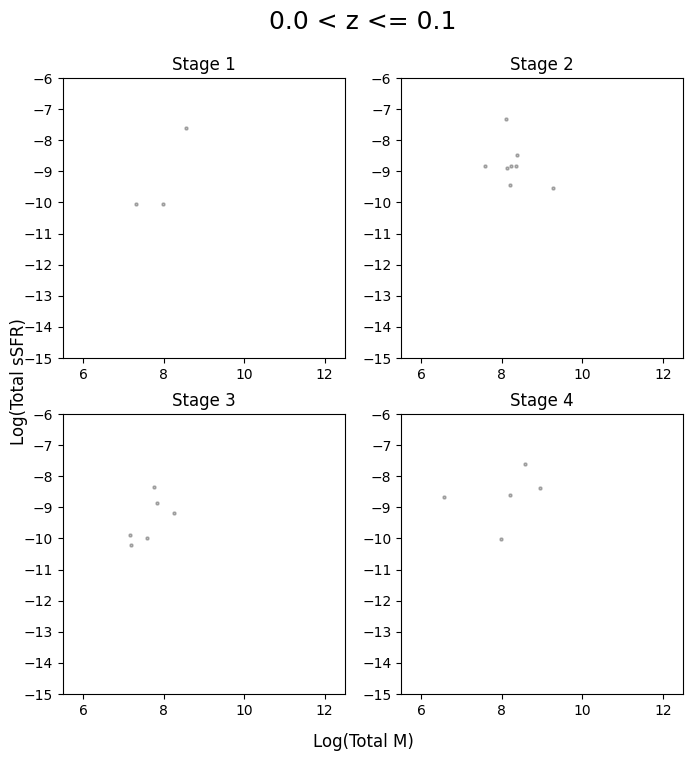

In [38]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sum(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 0)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(Total M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(Total sSFR)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.0 < z <= 0.1', ha = 'center', va = 'center', fontsize = 18)

plt.show()

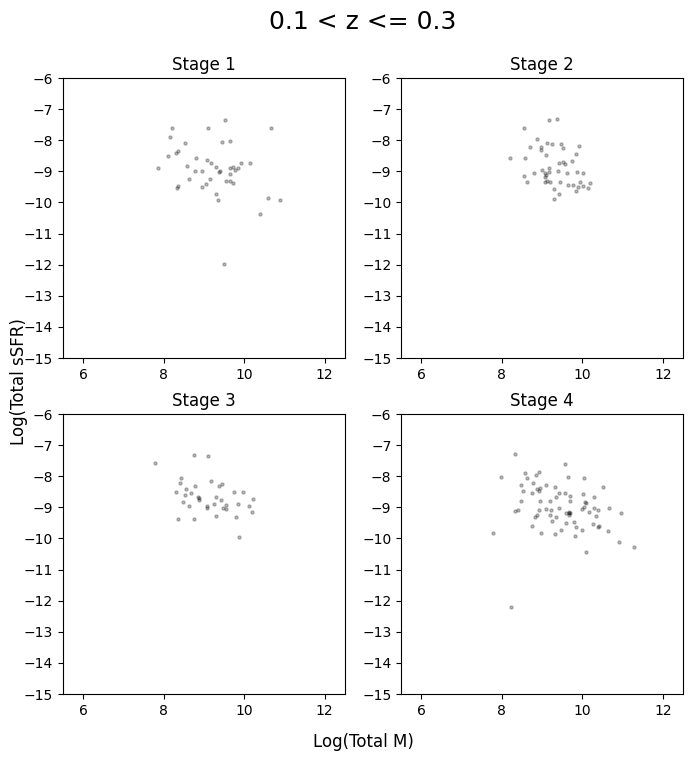

In [39]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sum(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 1)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(Total M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(Total sSFR)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.1 < z <= 0.3', ha = 'center', va = 'center', fontsize = 18)

plt.show()

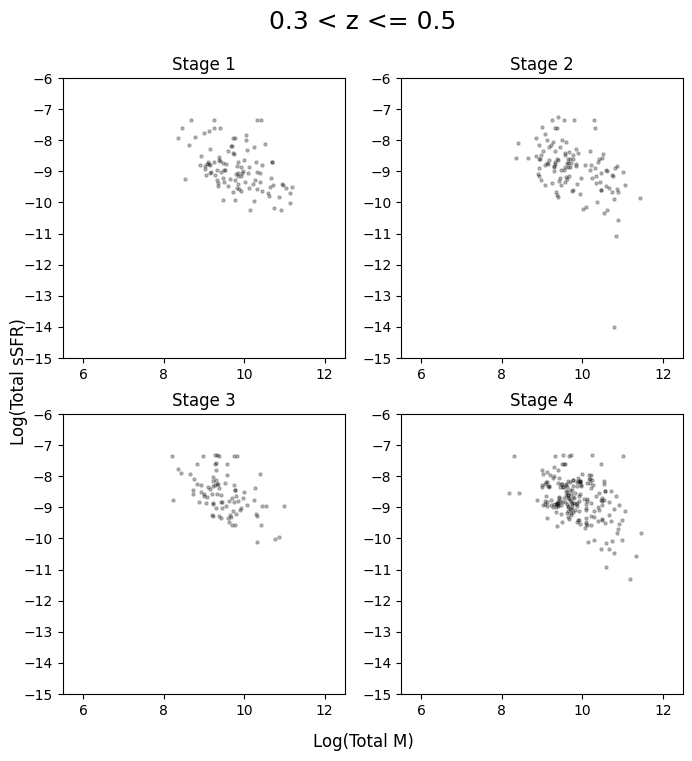

In [40]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sum(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 2)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(Total M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(Total sSFR)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.3 < z <= 0.5', ha = 'center', va = 'center', fontsize = 18)

plt.show()

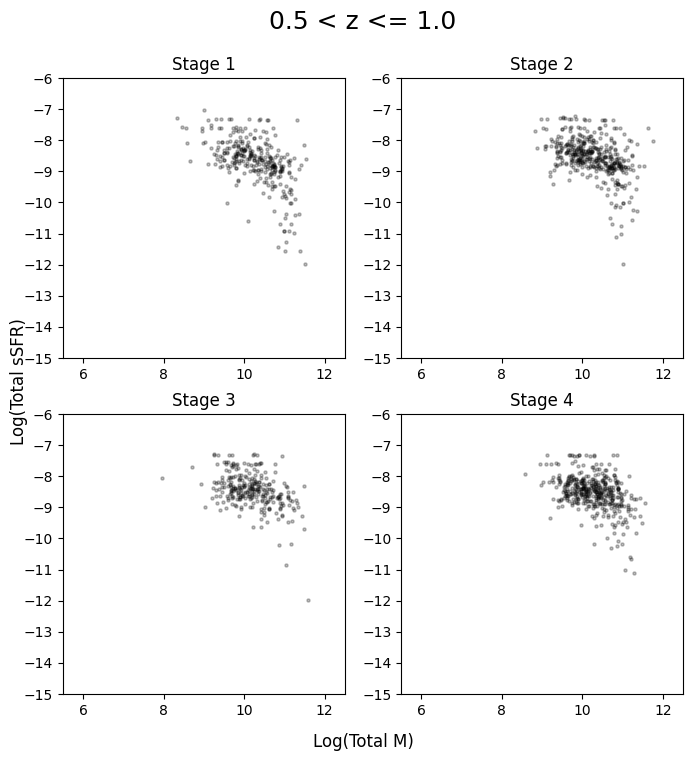

In [41]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sum(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 3)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(Total M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(Total sSFR)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.5 < z <= 1.0', ha = 'center', va = 'center', fontsize = 18)

plt.show()